In [1]:
from importlib import reload
from dataset import Dataset
import botr
from botr import BOTR_Layer, BOTR
from config import GENERATOR_CONFIG_DEFAULT
from coco_utils import all_category_names
from dataset import get_annotation_supercategory
from utils import display_multiple_images

In [2]:
dataset = Dataset()

=> loading coco asset: dataset/coco-safe-licenses.pickle
=> loading coco object - dataset/annotations/captions_train2017.json
loading annotations into memory...
Done (t=1.08s)
creating index...
index created!


In [3]:
# allowedCateg = all_category_names(
#   exclude=['person', 'other', 'animal', 'vehicle'])
allowedCateg = ["raw-material"]
# allowedCateg = random.sample(allowedCateg, random.randint(1,len(allowedCateg)))
# allowedCateg = ["sky"]

blendConfig = {
  "use_blending" : True,
  "pyr_kernel_size" : 9,
  "pyr_kernel_sigma" : 3,
  "mask_kernel_size" : 7,
  "mask_kernel_sigma" : 1.,
  "max_depth" : 5,
  "blur_masks" : False,
  "blur_iters" : 1,
  "plot_levels" : False,
  "level_step_size" : 4,
  'blurMaskPre' : True,
  "blurMaskPreIter" : 2,
  "blurMaskPreKernel" : 21
}

config = {
  # choose from "pyramid", "binary", "pro"
  'compositeType' : 'pro',
  # pro mode kernel size
  'proDilateKernel' : 3,
  # pro mode dilate iters
  'proDilateIter' : 2,
  # pro mode gaussian blur
  'proKernel' : 5,
  # average size of each patch (1 being mean of distribution)
  'avgPatchSize' : 0.1,
  # average size variance of each patch added
  'avgPatchVariance' : 0.1,
  # minimum area of a patch added, expressed as percentage px after masking
  'minPatchArea' : 0.0001, 
  # maximim area of a patch added, expressed as percentage px after masking
  'maxPatchArea' : 0.8, 
  # target percentage of pixels to fill
  'targetFill' : 0.99,
  # output image size
  'outputSize' : (256, 256),
  # prevent supercategories from appearing
  'allowedCategories' : allowedCateg,
  # choose either "stuff_ann", "instance_ann", or "any"
  'ann_key' : "any",
  # image blending options
  'image_blending' : blendConfig,
  # match historgrams on a channel basis
  'multichannelColorMatching' : -1,
  # add jpeg decimation
  'jpeg_quality' : 100,
  # normalize histograms when matching
  'normalizeHistogram' : False,
  # determines channel for matching
  'histogramChannelAxis' : -1,
  # reference layer for normalizing (overrides auto)
  'refLayerHistogram' : None,
    # use equalize_adapthist (slower)
  'adaptiveHistogram' : True,
  # kernel size for equalize_adapthist, none=1/8*width
  'adaptiveHistKernel' : None,
  # clip limit for adaptive hist between 0, 1
  'adaptiveHistClip' : 0.7,
  # ====== Language Model ========
   # choose 'markov' or 'lstm'
  'descriptionModel' : "lstm",
  # restrict corpus for description model
  'restrictCorpus' : True,
  # choose 'default'
  'titleModel' : "default"
}

In [68]:
import botr
reload(botr)
from botr import BOTR_Layer, BOTR

In [69]:
botrGen = BOTR(config, dataset)

[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape































































 27%|██▋       | 32/120 [01:16<03:29,  2.38s/it]


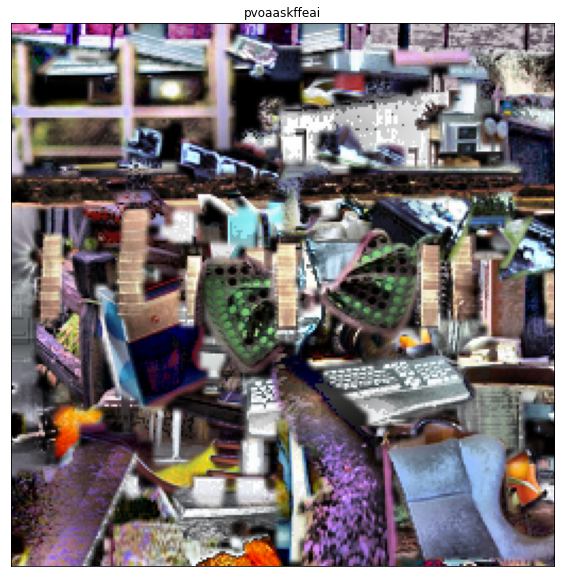

Description: fries put decorated ` ovens makes `` parked floored `.
removed 46 layers from canvas
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape


100%|██████████| 74/74 [00:06<00:00, 11.28it/s]


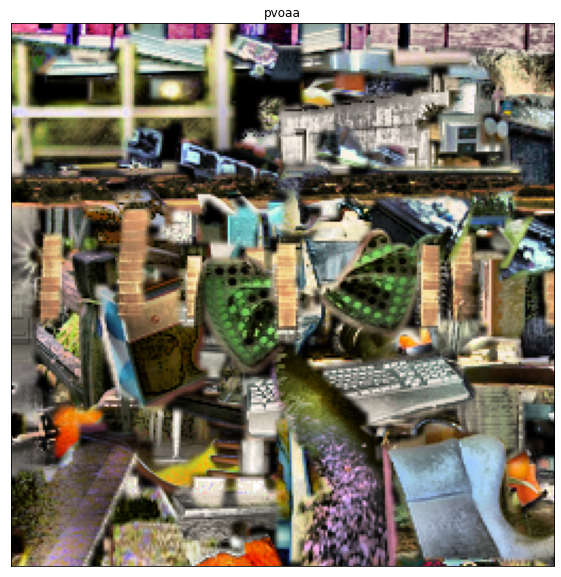

Description: dogs stacked topped `` ` ` `.


In [70]:
import random
areaTarget = 0.03
jitter = 0.1
tolerance = 0.001
layers = 120
exclude=['person', 'other', 'animal', 'vehicle', 'food']

while len(botrGen.layers) < layers:
    example = dataset.get_coco_example()
    if example.get_num_annotations() == 0:
        continue
    # target = random.random() * areaTarget
    ann, area = example.closest_ann_area(areaTarget * ((jitter * random.random()) + 1))
    if get_annotation_supercategory(ann) in exclude:
        continue
    if abs(area - areaTarget) < tolerance:
        botrGen.append_layer(BOTR_Layer(example, ann))


botrGen.generate(config)
botrGen.display()

# cleanup overlapped images not being seen
botrGen.layers.clean_invisible(100)
botrGen.generate(config)
botrGen.display()


=> finding similar annotations for 39 layers
finding new annotation for layer 0/39
finding new annotation for layer 10/39
finding new annotation for layer 20/39
finding new annotation for layer 30/39
=> replaced 38 annotations
[!] Histogram error: all input arrays must have the same shape


100%|██████████| 39/39 [00:03<00:00, 11.98it/s]


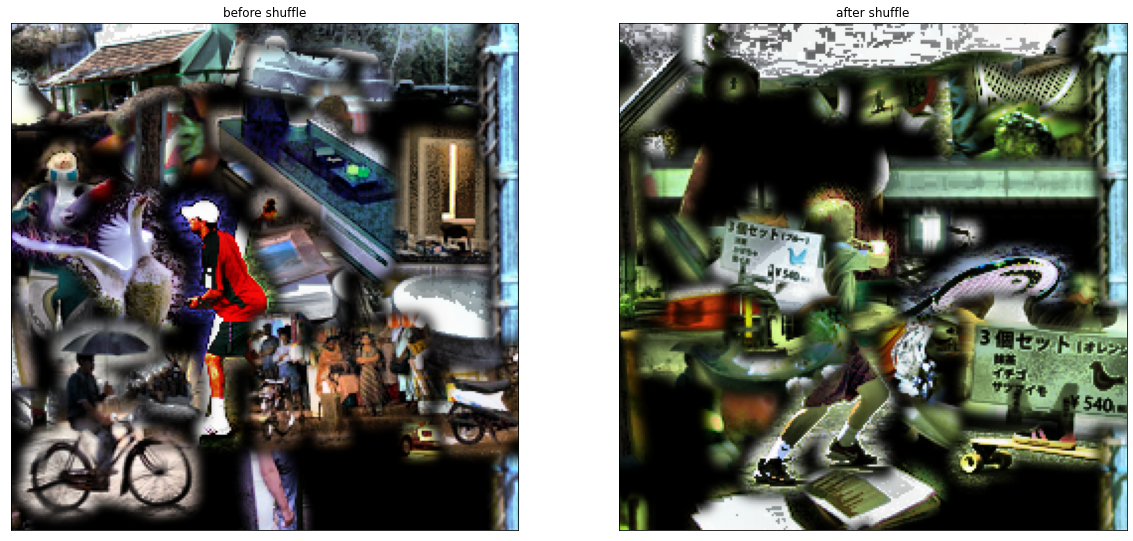

In [34]:
botrGen.layers.find_new_items(area_tolerance=0.07, pos_tolerance=10)
botrGen.generate()
botrGen.save_state()

display_multiple_images([botrGen[-2].image,botrGen[-1].image], ['before shuffle', 'after shuffle'])


[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape


100%|██████████| 74/74 [00:35<00:00,  2.09it/s]


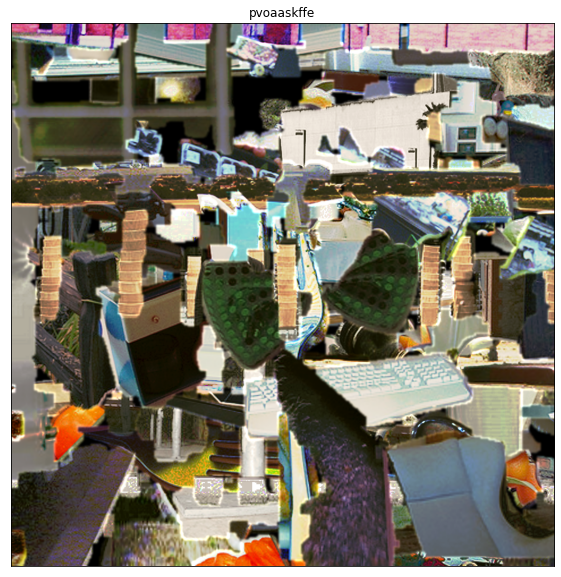

Description: adults colored dressed ` ) ` wii `` ` ` ` ``.


In [71]:
config['compositeType'] = 'pro'
# pro mode kernel size
config['proDilateKernel'] = 5
# pro mode dilate iters
config['proDilateIter'] = 3
# pro mode gaussian blur
config['proKernel'] = 9

config['multichannelColorMatching'] = -1
# add jpeg decimation
config['jpeg_quality'] = 100
# normalize histograms when matching
config['normalizeHistogram'] = False
# determines channel for matching
config['histogramChannelAxis'] = -1
# reference layer for normalizing (overrides auto)
config['refLayerHistogram'] = None
# use equalize_adapthist (slower)
config['adaptiveHistogram'] = False
# kernel size for equalize_adapthist, none=1/8*width
config['adaptiveHistKernel'] = 15
# clip limit for adaptive hist between 0, 1
config['adaptiveHistClip'] = 0.8
config['outputSize'] = [1024,1024]
# botrGen.layers.shuffle_order()
botrGen.generate(config)
botrGen.display()

In [ ]:
botrGen.display()

In [72]:
botrGen.save_assets("out/", botrGen.generatedItem)

saved image and metadata pair: out/23.png out/23.json


after the fact, remove layers that aren't covering much area

In [ ]:
botrGen.layers.clean_invisible(3000)
botrGen.generate(config)
botrGen.display()

In [ ]:
for i in range(10):
  config['adaptiveHistogram'] = True
  # kernel size for equalize_adapthist, none=1/8*width
  config['adaptiveHistKernel'] = random.randint(3,19)
  # clip limit for adaptive hist between 0, 1
  config['adaptiveHistClip'] = 0.9
  botrGen.layers.shuffle_order()
  botrGen.generate(config)
  botrGen.display()

In [ ]:
config["image_blending"] = {
  "use_blending" : False,
  "pyr_kernel_size" : 9,
  "pyr_kernel_sigma" : 1,
  "mask_kernel_size" : 9,
  "mask_kernel_sigma" : 1.,
  "max_depth" : 7,
  "blur_masks" : True,
  "blur_iters" : 1,
  "plot_levels" : False,
  "level_step_size" : 4
}
config["adaptiveHistogram"] = True
config["outputSize"] = [256,256]
botrGen.generate(config)
botrGen.display()

In [ ]:
botrGen[-2].display()

In [ ]:
for i in range(100):
    for layer in botrGen.layers:
        layer.shuffle_ann()

    botrGen.generate(config)
    # botrGen.display()


In [ ]:
generated = iter(botrGen)

for g in generated:
    g.display()

In [ ]:
for i in range(len(botrGen.layers)):
    botrGen.generate(config)
    botrGen.layers.remove_smallest_n(1)
    print(f'botrgen layers size {len(botrGen.layers)}')

In [137]:
botrGen[0].image.save(fp="out/shuffling.gif", format='GIF', 
        append_images=[g.image for g in iter(botrGen)],
         save_all=True, duration=200, loop=0)

In [ ]:
botrGen.generatedItem.display_categories()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
for layer in botrGen.layers:
    hist, img = layer.dominant_color(config["outputSize"])
    print(np.max(hist))
    print(np.mean(hist))
    print(np.median(hist))
    plt.imshow(img)
    plt.show()
    plt.plot(hist[:, 10:-10].T)
    # plt.hist(hist[0, hist[0, :] > 0.1], color='red')
    # plt.hist(hist[1, hist[1, :] > 0.1], color='green')
    # plt.hist(hist[2, hist[2, :] > 0.1], color='blue')
    plt.show()
